In [3]:
# Import - Manipulacion de datos
import numpy as np
import pandas as pd

# Import - Visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Importamos el Dataset de CABA
df = pd.read_csv('datasets/delitos.csv')

# Revisamos la cabecera
df.head()

,id,comuna,barrio,latitud,longitud,fecha,hora,uso_arma,uso_moto,lugar,origen_dato,tipo_delito,cantidad_vehiculos,cantidad_victimas
0,68313,Comuna 7,FLORES,-34.647598,-58.442600,2016-01-31,19:50:00,SIN USO DE ARMA,SIN MOTO,NaN,NaN,Homicidio Doloso,0,0
1,130524,Comuna 9,LINIERS,-34.639801,-58.529701,2016-01-31,12:00:00,SIN USO DE ARMA,SIN MOTO,NaN,NaN,Robo (Con violencia),0,0
2,130582,Comuna 9,LINIERS,-34.638802,-58.527500,2016-01-31,08:30:00,SIN USO DE ARMA,SIN MOTO,NaN,NaN,Robo (Con violencia),0,0
3,130586,Comuna 10,VILLA REAL,-34.618000,-58.527302,2016-01-31,20:30:00,SIN USO DE ARMA,SIN MOTO,NaN,NaN,Hurto Automotor,0,0
4,130615,Comuna 9,LINIERS,-34.645599,-58.526501,2016-01-31,20:24:00,SIN USO DE ARMA,SIN MOTO,NaN,NaN,Robo (Con violencia),0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350980 entries, 0 to 350979
Data columns (total 14 columns):
id                    350980 non-null int64
comuna                348018 non-null object
barrio                348018 non-null object
latitud               350980 non-null float64
longitud              350980 non-null float64
fecha                 350980 non-null object
hora                  350824 non-null object
uso_arma              350980 non-null object
uso_moto              350980 non-null object
lugar                 0 non-null float64
origen_dato           0 non-null float64
tipo_delito           350980 non-null object
cantidad_vehiculos    350980 non-null int64
cantidad_victimas     350980 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 37.5+ MB


In [6]:
#Borramos las columnas sin datos
df.drop(['lugar'], axis = 1, inplace=True)
df.drop(['origen_dato'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350980 entries, 0 to 350979
Data columns (total 12 columns):
id                    350980 non-null int64
comuna                348018 non-null object
barrio                348018 non-null object
latitud               350980 non-null float64
longitud              350980 non-null float64
fecha                 350980 non-null object
hora                  350824 non-null object
uso_arma              350980 non-null object
uso_moto              350980 non-null object
tipo_delito           350980 non-null object
cantidad_vehiculos    350980 non-null int64
cantidad_victimas     350980 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 32.1+ MB


In [7]:
#Completamos los datos nulos
df['hora'].fillna('99:99:99', inplace = True)
df['comuna'].fillna('N/A', inplace = True)
df['barrio'].fillna('N/A', inplace = True)

In [8]:
#Damos formato a la fecha
df['fecha_for'] = pd.to_datetime(df['fecha'])
#Extraemos dia de la semana
df['dia_semana'] = df['fecha_for'].dt.dayofweek

In [9]:
#Analizamos los tipos de crimes 
df['tipo_delito'].value_counts()

Robo (Con violencia)     200374
Hurto (Sin violencia)    112301
Hurto Automotor           18010
Lesiones Seg Vial          9833
Robo Automotor             9793
Homicidio Doloso            405
Homicidio Seg Vial          264
Name: tipo_delito, dtype: int64

## Analisis Exploratorio

In [10]:
df_indexado = df
df_indexado.index = pd.DatetimeIndex(df_indexado['fecha_for'])

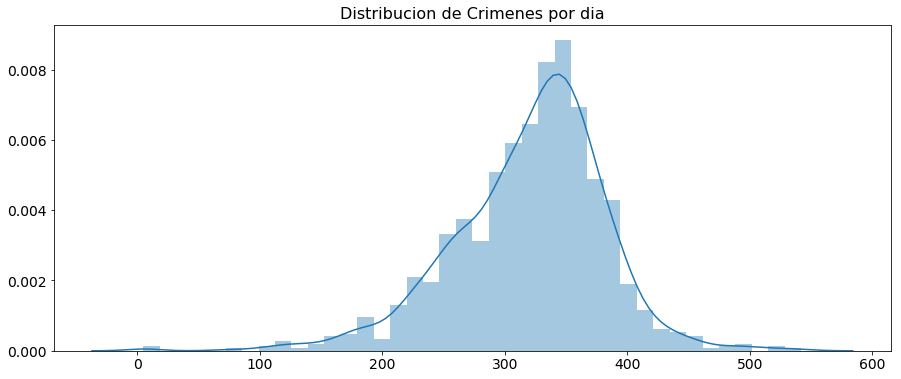

In [11]:
plt.figure(figsize=(15,6))
plt.title('Distribucion de Crimenes por dia', fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(df_indexado.resample('D').size(), bins=40);

#### Outlier

In [12]:
df_indexado.resample('D').size().idxmax()
# Find out how many crimes by getting the length


Timestamp('2018-09-01 00:00:00', freq='D')

In [13]:
len(df_indexado['2018-09-01'])

542

In [14]:
# Creamos limites de control  - Alto y Bajo
crimenes_daily = pd.DataFrame(df_indexado[df_indexado['fecha_for'] != '2018-09-01'].resample('D').size())
crimenes_daily['MEAN'] = df_indexado[df_indexado['fecha_for'] != '2018-09-01'].resample('D').size().mean()
crimenes_daily['STD'] = df_indexado[df_indexado['fecha_for'] != '2018-09-01'].resample('D').size().std()

UCL = crimenes_daily['MEAN'] + 3 * crimenes_daily['STD']
LCL = crimenes_daily['MEAN'] - 3 * crimenes_daily['STD']

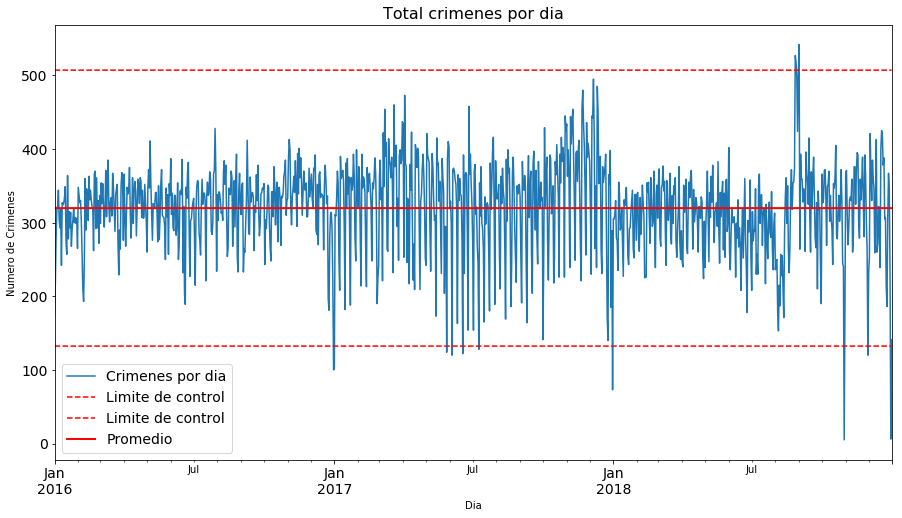

In [15]:
# Dibujamos el Total de crimenes por dia, UCL, LCL, Moving-average
plt.figure(figsize=(15,8))
df_indexado.resample('D').size().plot(label='Crimenes por dia')
UCL.plot(color='red', ls='--', linewidth=1.5, label='Limite de control')
LCL.plot(color='red', ls='--', linewidth=1.5, label='Limite de control')
crimenes_daily['MEAN'].plot(color='red', linewidth=2, label='Promedio')
plt.title('Total crimenes por dia', fontsize=16)
plt.xlabel('Dia')
plt.ylabel('Numero de Crimenes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':14});

#### Pasamos a analizar el 01/09/2018. Error de datos? o comportamiento normal?

In [16]:
#Analizamos los tipos de delitos de ese dia
df_indexado['2018-09-01']['tipo_delito'].value_counts()

Robo (Con violencia)     376
Hurto (Sin violencia)    143
Hurto Automotor           15
Robo Automotor             7
Homicidio Doloso           1
Name: tipo_delito, dtype: int64

In [17]:
#Analizamos los lugares de los delitos
df_indexado['2018-09-01']['barrio'].value_counts().head(5)

BALVANERA    43
RECOLETA     39
PALERMO      37
FLORES       32
CABALLITO    30
Name: barrio, dtype: int64

In [18]:
#Analizamos el horario de los delitos
df_indexado['2018-09-01']['hora'].value_counts().head().sort_index()

05:00:00    13
12:00:00    12
14:00:00    11
18:00:00    16
20:00:00    13
Name: hora, dtype: int64

#### El 01/09/2018 tenemos 542 delitos. La mayoria robo con violencia, en el barrio Balvanera, alrededor de las 18:00 hrs.Lo que nos lleva a concluir que no es un error de datos. 

### Promedio de Crimenes por dia y por mes

In [19]:
#creamos las columnas de anho, mes y dia
df_indexado['anho'] = df_indexado['fecha_for'].dt.year 
df_indexado['mes'] = df_indexado['fecha_for'].dt.month 
df_indexado['dia'] = df_indexado['fecha_for'].dt.day
df_indexado['solo_hora'] = df_indexado['hora'].apply(lambda s: int(s.split(':')[0]))

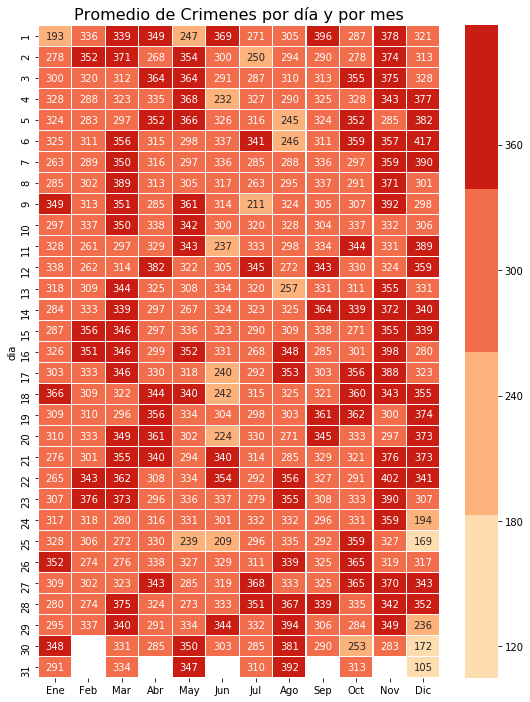

In [20]:
# Create a pivot table with day and month; another that counts the number of years that each day had; and the average. 
crimes_pivot_table = df_indexado.pivot_table(values='anho', index='dia', columns='mes', aggfunc=len)
crimes_pivot_table_year_count = df_indexado.pivot_table(values='anho', index='dia', columns='mes', aggfunc=lambda x: len(x.unique()))
crimes_average = crimes_pivot_table/crimes_pivot_table_year_count
crimes_average.columns = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

# Using seaborn heatmap
plt.figure(figsize=(9,12))
plt.title('Promedio de Crimenes por día y por mes', fontsize=16)
sns.heatmap(crimes_average.round(), cmap=sns.color_palette("OrRd", 4), linecolor='white',linewidths=0.1, cbar=True, annot=True, fmt=".0f");

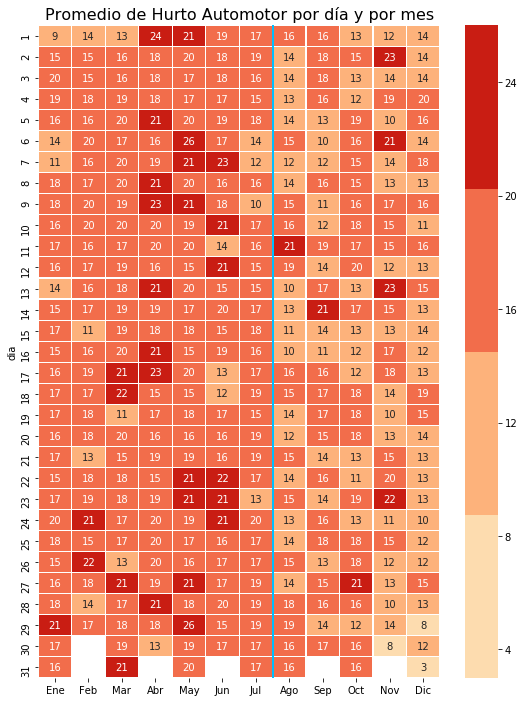

In [21]:
# Create a pivot table with day and month; another that counts the number of years that each day had; and the average. 
crimes_pivot_table = df_indexado[(df_indexado['tipo_delito'] == 'Hurto Automotor')].pivot_table(values='anho', index='dia', columns='mes', aggfunc=len)
crimes_pivot_table_year_count = df_indexado[(df_indexado['tipo_delito'] == 'Hurto Automotor')].pivot_table(values='anho', index='dia', columns='mes', aggfunc=lambda x: len(x.unique()))
crimes_average = crimes_pivot_table/crimes_pivot_table_year_count
crimes_average.columns = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

# Using seaborn heatmap
plt.figure(figsize=(9,12))
plt.title('Promedio de Hurto Automotor por día y por mes', fontsize=16)
plt.vlines(x=7, ymin=0, ymax=31, colors='deepskyblue', linestyles='solid',lw=2)
sns.heatmap(crimes_average.round(), cmap=sns.color_palette("OrRd", 4), linecolor='white',linewidths=0.1, cbar=True, annot=True, fmt=".0f");

### Crimenes por mes

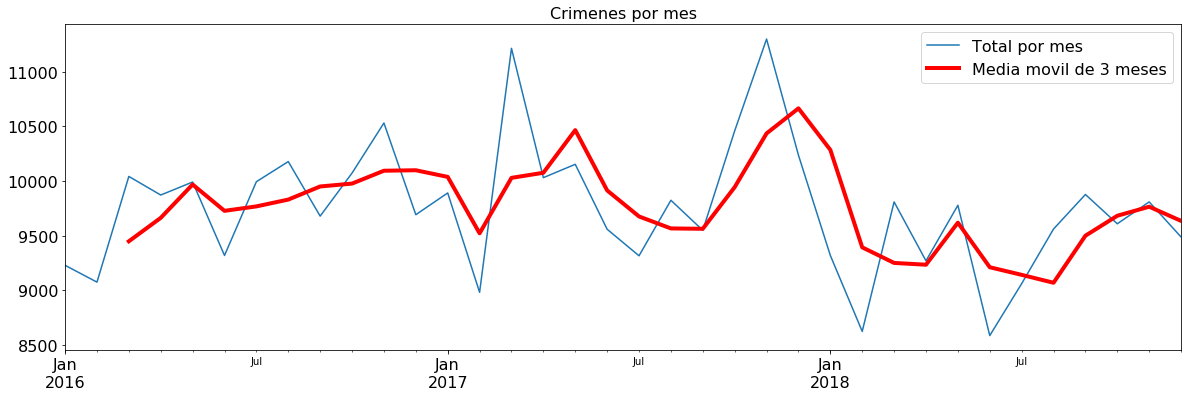

In [22]:
# Crimenes por mes, con media movil 3
plt.figure(figsize=(20,6))
df_indexado.resample('M').size().plot(label='Total por mes')
df_indexado.resample('M').size().rolling(window=3).mean().plot(color='red', linewidth=4, label='Media movil de 3 meses')

plt.title('Crimenes por mes', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

#### Obs: Vemos un pico entre octubre/novimbre-2017, vemos que eran tiempos de campañas electorales legislativas que podrian ser un detonante para el aumento de los crimenes. 

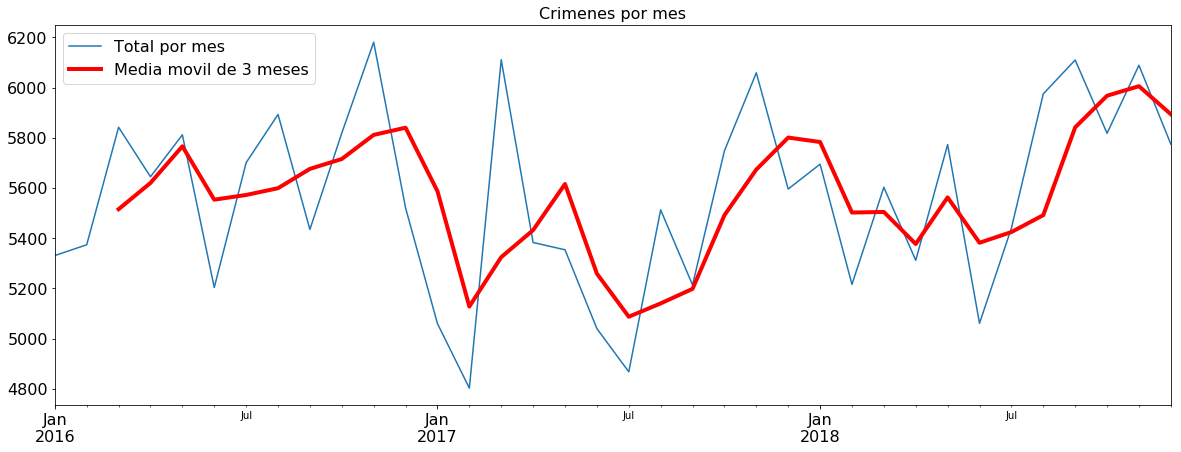

In [23]:
# Crimenes por mes, con media movil 3
plt.figure(figsize=(20,7))
df_indexado[(df_indexado['tipo_delito'] == 'Robo (Con violencia)')].resample('M').size().plot(label='Total por mes')
df_indexado[(df_indexado['tipo_delito'] == 'Robo (Con violencia)')].resample('M').size().rolling(window=3).mean().plot(color='red', linewidth=4, label='Media movil de 3 meses')

plt.title('Crimenes por mes', fontsize=16)
plt.xlabel('')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

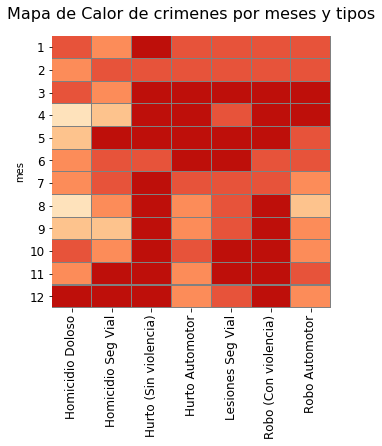

In [24]:
# Create a pivot table with month and category. 
crimes_pivot_table = df_indexado.pivot_table(values='fecha_for', index='tipo_delito', columns='mes', aggfunc=len)

# To compare categories, I'm scaling each category by diving by the max value of each one
crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

# Using a for loop to scale others
for i in range(7):
    crimes_scaled[crimes_pivot_table.index[i]] =  pd.DataFrame(crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max())
                    
# Using seaborn heatmap
plt.figure(figsize=(5,5))
plt.title('Mapa de Calor de crimenes por meses y tipos', fontsize=16, y=1.04)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap=sns.color_palette("OrRd", 5), linecolor='grey',linewidths=0.1, cbar=False);
plt.yticks(rotation=0);

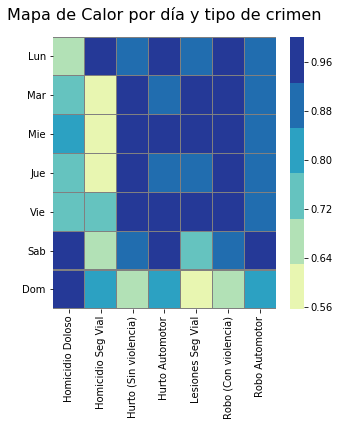

In [25]:
# Create a pivot table with day of the week and category. 
crimes_pivot_table = df_indexado.pivot_table(values='fecha_for', index='tipo_delito', columns='dia_semana', aggfunc=len)

# To compare categories, I'm scaling each category by diving by the max value of each one
crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

# Using a for loop to scale row
for i in range(7):
    crimes_scaled[crimes_pivot_table.index[i]] = crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max()
                    
crimes_scaled.index = ['Lun','Mar','Mie','Jue','Vie','Sab','Dom']

# Using seaborn heatmap
plt.figure(figsize=(5,5))
plt.title('Mapa de Calor por día y tipo de crimen', fontsize=16, y=1.04)
plt.tick_params(labelsize=10) 
sns.heatmap(crimes_scaled, cmap=sns.color_palette("YlGnBu", 6), linecolor='grey',linewidths=0.1, cbar=True);
plt.yticks(rotation=0);

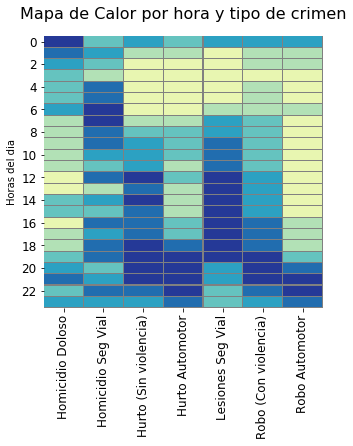

In [26]:
# Create a pivot table with hour and category. 
crimes_pivot_table = df_indexado[(df_indexado['solo_hora'] != 99)].pivot_table(values='fecha_for', index='tipo_delito', columns='solo_hora', aggfunc=len)

# To compare categories, I'm scaling each category by diving by the max value of each one
crimes_scaled = pd.DataFrame(crimes_pivot_table.iloc[0] / crimes_pivot_table.iloc[0].max())

# Using a for loop to scale row
for i in range(7):
    crimes_scaled[crimes_pivot_table.index[i]] =  pd.DataFrame(crimes_pivot_table.iloc[i] / crimes_pivot_table.iloc[i].max())
                    
# Using seaborn heatmap
plt.figure(figsize=(5,5))
plt.title('Mapa de Calor por hora y tipo de crimen', fontsize=16, y=1.04)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap=sns.color_palette("YlGnBu", 6), linecolor='grey',linewidths=0.1, cbar=False);
plt.yticks(rotation=0);
plt.ylabel('Horas del dia');

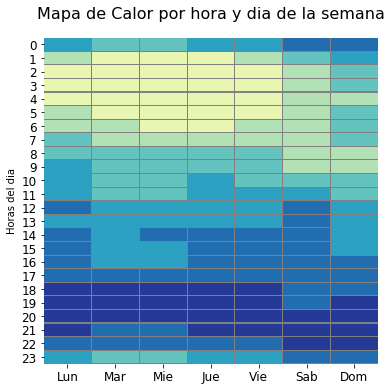

In [27]:
# Create a pivot table with hour and day of week. 
crimes_pivot_table = df_indexado[(df_indexado['solo_hora'] != 99)].pivot_table(values='fecha_for', index='dia_semana', columns='solo_hora', aggfunc=len)


# To compare categories, I'm scaling each category by diving by the max value of each one
crimes_scaled = pd.DataFrame(crimes_pivot_table.loc[0] / crimes_pivot_table.loc[0].max())

# Using a for loop to scale each day
for i in [1,2,3,4,5,6]:
    crimes_scaled[i] = crimes_pivot_table.loc[i] / crimes_pivot_table.loc[i].max()

# Rename days of week
crimes_scaled.columns = ['Lun','Mar','Mie','Jue','Vie','Sab','Dom']

# Using seaborn heatmap
plt.figure(figsize=(6,6))
plt.title('Mapa de Calor por hora y dia de la semana', fontsize=16, y=1.04)
plt.tick_params(labelsize=12)
sns.heatmap(crimes_scaled, cmap=sns.color_palette("YlGnBu", 6), linecolor='grey',linewidths=0.1, cbar=False);
plt.ylabel('Horas del dia');


In [28]:
crimes_pivot_table

solo_hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dia_semana,,,,,,,,,,,,,,,,,,,,,
0,2336,1064,868,715,713,972,1208,1569,1903,2082,...,2656,2607,2579,2820,3337,3591,3604,3281,2933,2140
1,2198,917,666,532,530,776,1089,1462,1935,2041,...,2825,2772,2690,2972,3484,3621,4023,3400,2973,2233
2,2235,899,591,481,556,782,1019,1514,2018,2136,...,2856,2690,2806,3036,3604,3851,4034,3406,2946,2199
3,2232,891,688,604,581,730,980,1412,1996,2084,...,2896,2765,2730,2941,3493,3726,3864,3408,2940,2218
4,2222,1040,742,641,651,809,1047,1464,1945,2018,...,2877,2785,2884,3006,3606,3657,3857,3539,3114,2432
5,2308,1379,1152,998,1019,1192,1211,1086,1169,1272,...,2340,2280,2336,2409,2645,2680,3173,3177,2809,2330
6,2089,1398,1215,1067,964,1106,1184,1030,838,832,...,1630,1678,1786,1798,2035,2332,2456,2487,2396,1885


In [29]:
df_indexado.head()

,id,comuna,barrio,latitud,longitud,fecha,hora,uso_arma,uso_moto,tipo_delito,cantidad_vehiculos,cantidad_victimas,fecha_for,dia_semana,anho,mes,dia,solo_hora
fecha_for,,,,,,,,,,,,,,,,,,
2016-01-31,68313,Comuna 7,FLORES,-34.647598,-58.442600,2016-01-31,19:50:00,SIN USO DE ARMA,SIN MOTO,Homicidio Doloso,0,0,2016-01-31,6,2016,1,31,19
2016-01-31,130524,Comuna 9,LINIERS,-34.639801,-58.529701,2016-01-31,12:00:00,SIN USO DE ARMA,SIN MOTO,Robo (Con violencia),0,0,2016-01-31,6,2016,1,31,12
2016-01-31,130582,Comuna 9,LINIERS,-34.638802,-58.527500,2016-01-31,08:30:00,SIN USO DE ARMA,SIN MOTO,Robo (Con violencia),0,0,2016-01-31,6,2016,1,31,8
2016-01-31,130586,Comuna 10,VILLA REAL,-34.618000,-58.527302,2016-01-31,20:30:00,SIN USO DE ARMA,SIN MOTO,Hurto Automotor,0,0,2016-01-31,6,2016,1,31,20
2016-01-31,130615,Comuna 9,LINIERS,-34.645599,-58.526501,2016-01-31,20:24:00,SIN USO DE ARMA,SIN MOTO,Robo (Con violencia),0,0,2016-01-31,6,2016,1,31,20


In [30]:
df_indexado[(df_indexado['solo_hora'] == 99)].info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2018-01-29 to 2018-11-08
Data columns (total 18 columns):
id                    156 non-null int64
comuna                156 non-null object
barrio                156 non-null object
latitud               156 non-null float64
longitud              156 non-null float64
fecha                 156 non-null object
hora                  156 non-null object
uso_arma              156 non-null object
uso_moto              156 non-null object
tipo_delito           156 non-null object
cantidad_vehiculos    156 non-null int64
cantidad_victimas     156 non-null int64
fecha_for             156 non-null datetime64[ns]
dia_semana            156 non-null int64
anho                  156 non-null int64
mes                   156 non-null int64
dia                   156 non-null int64
solo_hora             156 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(7)
memory usage: 23.2+ KB
